In [2]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

RNN的运用场景，语音识别，每个音素不是独立的，而是有上下关联的，DNN默认所有的都是独立的，丢失了上下文这个维度的信息。注意RNN的输入顺序是不能改变的。

### RNN的运作原理
wh为memory的向量，初始为0，跟一般的神经网络一样，只是在激活函数的输入中多了个wh，即转换后的输出为a=σ(wx + wh*0)，如下图：

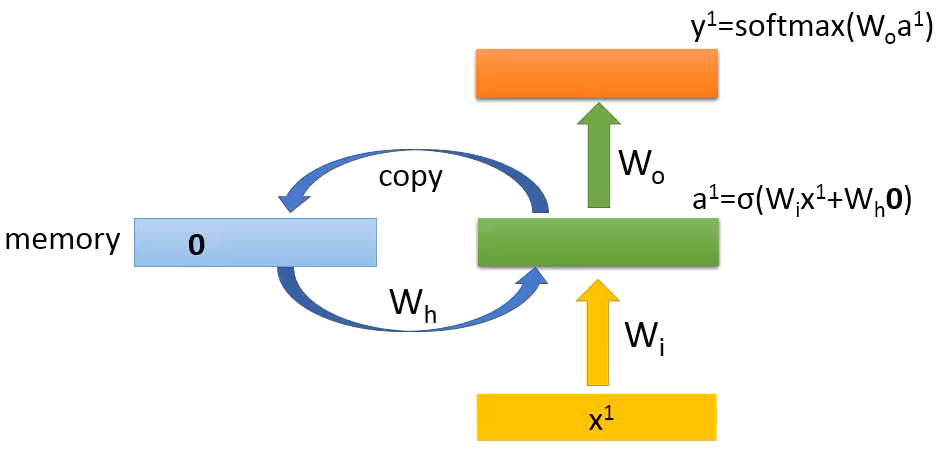

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Deep%20Learning%20Neural%20Network%20with%20Memory/RNN01.png')

接下来，将隐藏层的输出a1存入memory，然后输入x2，跟前面一样，然后将a2存入memory：

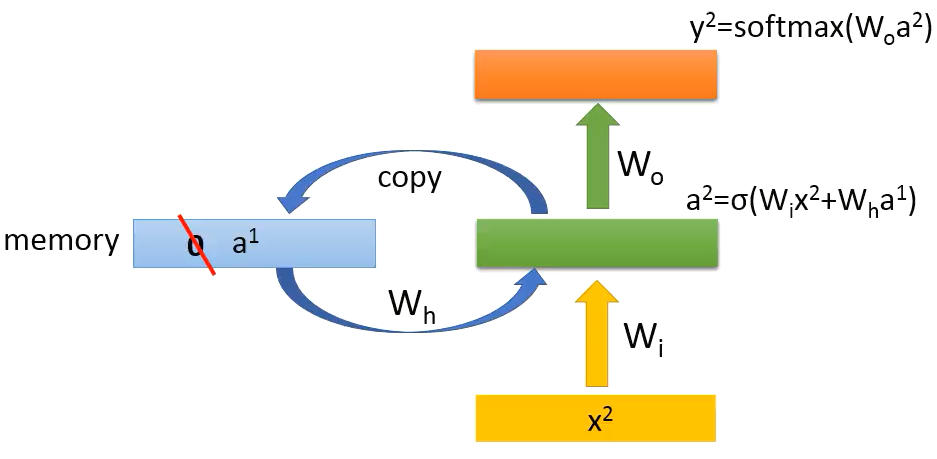

In [4]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Deep%20Learning%20Neural%20Network%20with%20Memory/RNN02.png')

通过下图可看出y2的值不仅受到x2的影响，还有a1的影响，而a1的值又受到x1的影响，如果是y5的值，则会收到x1到x5的影响。注意一点Wh、Wo和Wi的权重矩阵都是同一个，这里只是将其铺展开来。RNN的一个缺陷是x1到xi的影响是从小到大，但是在实际中，存在某些情况是前期的值影响大，如x1到x3的值会影响到y7，而x4到x6的值不会影响到y7，但在RNN中很难实现这种。

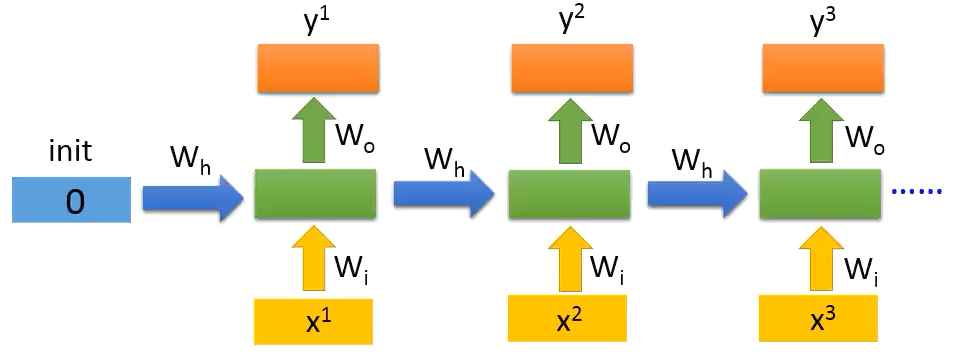

In [5]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Deep%20Learning%20Neural%20Network%20with%20Memory/RNN03.png')

In [ ]:
RNN训练遇到的情况，损失函数在慢慢下降，但会在某个点突然爆增，这是RNN本身的特性，造成训练会出现这种情况

下个时间点每个隐藏层输出当前时间点的输入乘以权重矩阵x(t+1)*Wi，加上前一个时间点的隐藏层的输出x(t)*Wh：

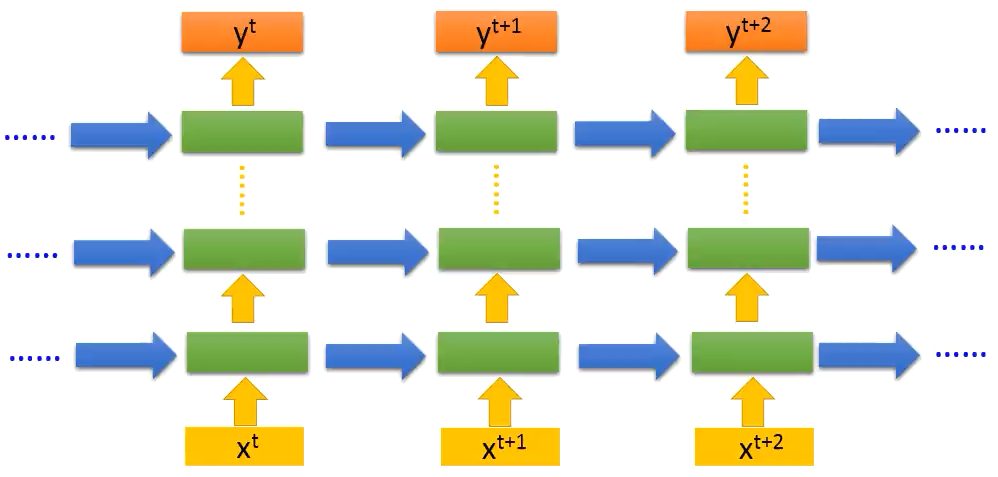

In [7]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Deep%20Learning%20Neural%20Network%20with%20Memory/RNN04.png')

在RNN里是直接将值放入memory里，而使用LSTM则有3个gate来控制，把LSTM想成一种特别的神经元，它有4个输入一个输出，真正的输入x和操控3个gate的signal，即Input Gate、Output Gate、Forget Gate
：
- Input Gate，控制输入是否能进入；
- Output Gate， 控制Memory Cell的值是否能输出，如为关闭，则不能输出，即为0；
- Forget Gate，打开则将Input Gate的输入记录到Memory Cell，关闭则清空Memory Cell里的值；

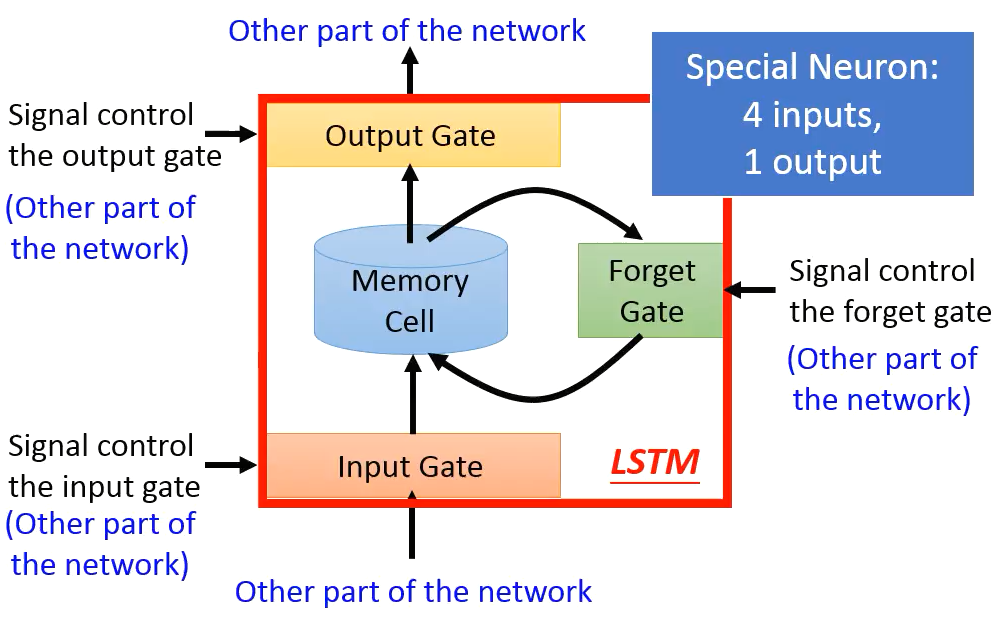

In [8]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Deep%20Learning%20Neural%20Network%20with%20Memory/RNN05.png')

一般的神经网络只有一个输入，而LSTM有4个输入Z、Zi、Zo、Zf，对应4个权重矩阵，所以LSTM的参数是一般神经网络参数的4倍，因为每个输入需要对应的4个权重矩阵，而一般的神经网络只有一个输入对应一个权重矩阵。并且a的输入不仅与t时刻的Z、Zi、Zo、Zf有关，还需要知道Memory Cell里存的值，而Memory Cel里存的是t时刻之前Z的值。Input Gate、Forget Gate、Output Gate的激活函数一般为Sigmoid函数，因为Sigmoid函数的输出在0~1之间，模拟一个gate是打开还是关闭的情形。接近0为关闭状态，接近1为打开状态。LSTM运作原理：
- 输入Z，通过激活函数，得到g(Z);
- Input Gate的Zi通过激活函数，得到f(Zi)，然后g(Z)乘以f(Zi)，如果f(Zi)为打开状态，值为1，则g(Z)f(Zi)=g(Z)，将f(Zi)传入进去。如果f(Zi)为关闭状态，值为0，g(Z)f(Zi)=0，则g(Z)被阻断了；
- Forget Gate的Zf通过激活函数，得到f(Zf)，将Memory Cell的值C乘以f(Zf)，如果f(Zf)为打开状态，值为1，则cf(Zf)=c，将c传入进去，如Memory Cell存在以前的值，则进行相加。如果f(Zf)为关闭状态，值为0，g(Z)f(Zf)=0，则Memory Cell里以前的值会被清空；
- 把Input Gate f(Zi)乘以通过激活函数的输入值g(Z)和Forget Gate f(Zf)乘以Memory Cell值c，即c'=g(Z)f(Zi) + cf(Zf)。如果 Forget Gate的输出f(Zf)为0，则清空Memory Cell里的值cf(Zf)=0，即不受以前值的影响，c'=g(Z)f(Zi)。如果如果 Forget Gate的输出f(Zf)为1，则会收到以前值的影响，加上Memory Cell里的值，即c'=g(Z)f(Zi) + cf(Zf)；
- 将c'通过激活函数得到h(c')，Output Gate的Zo通过激活函数，得到f(Zo)。如果f(Zo)为打开状态，值为1，则a=h(c')f(Zo)，输出h(c')。如果f(Zo)为关闭状态，值为0，h(c')f(Zo)=0，输出被阻断，为0。

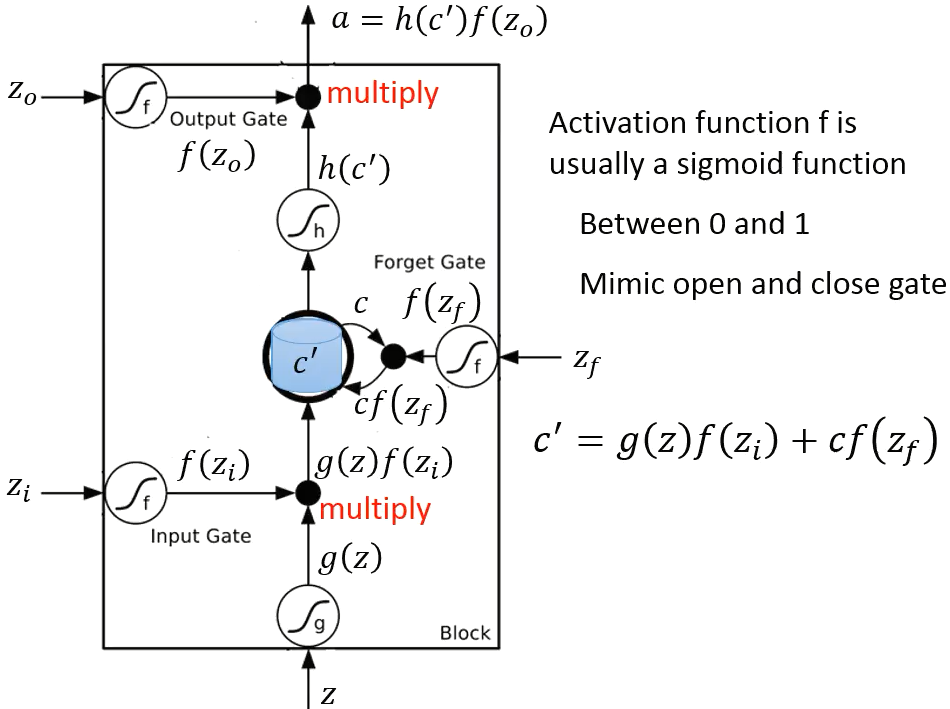

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Deep%20Learning%20Neural%20Network%20with%20Memory/RNN06.png')